In [27]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [28]:
from sklearn.datasets import load_boston

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)


In [29]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [30]:
X.drop('CHAS', axis=1, inplace=True)
y = pd.Series(boston.target, name='MEDV')

In [31]:
X.head(10)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)

In [34]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))


R squared: 0.7355165089722999


In [35]:
import numpy as np
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 7.582867140522808e-16


In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-1.13139078e-01  4.70524578e-02  4.03114536e-02 -1.73669994e+01
  3.85049169e+00  2.78375651e-03 -1.48537390e+00  3.28311011e-01
 -1.37558288e-02 -9.90958031e-01  9.74145094e-03 -5.34157620e-01]
Intercept: 36.89195979693238
R^2 score: 0.7355165089722999


In [38]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          7.30e-134
Time:                        20:17:29   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8920      5.147      7.168      0.000      26.780      47.004
CRIM          -0.1131      0.033     -3.417      0.001      -0.178      -0.048
ZN             0.0471      0.014      3.398      0.001       0.020       0.074
INDUS          0.0403      0.062      0.653      0.514      -0.081       0.162
NOX          -17.3670      3.851     -4.509      0.000     -24.934      -9.800
RM             3.8505      0.421      9.137      0.000       3.023       4.678
AGE            0.0028      0.013      0.209      0.834      -0.023       0.029
DIS           -1.4854      0.201     -7.383      0.000      -1.881      -1.090
RAD            0.3283      0.067      4.934      0.000       0.198       0.459
TAX           -0.0138      0.004     -3.653      0.000      -0.021      -0.006
PTRATIO       -0.9910      0.131     -7.542      0.000      -1.249      -0.733
B              0.0097      0.003      3.600      0.000       0.004       0.015
LSTAT         -0.5342      0.051    -10.459      0.000      -0.635      -0.434
==============================================================================
Omnibus:                      190.856   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.352
Skew:                           1.619   Prob(JB):                    8.42e-196
Kurtosis:                       8.668   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

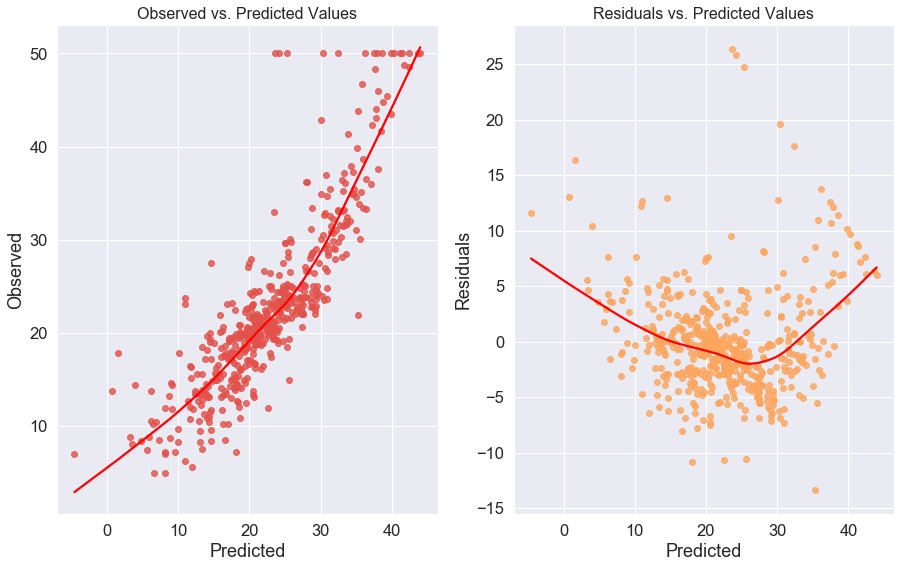

In [39]:
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)    

In [36]:
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.y_pred()
    resids = model.residuals

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(regr, y)    

AttributeError: 'LinearRegression' object has no attribute 'y_pred'

In [18]:
Xlog = np.sqrt(X)


In [19]:
Xlog.head(10)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.079498,4.242641,1.519868,0.733485,2.564176,8.074652,2.022375,1.000000,17.204651,3.911521,19.922349,2.231591
1,0.165257,0.000000,2.658947,0.684836,2.533969,8.882567,2.228699,1.414214,15.556349,4.219005,19.922349,3.023243
2,0.165197,0.000000,2.658947,0.684836,2.680485,7.816649,2.228699,1.414214,15.556349,4.219005,19.819939,2.007486
3,0.179917,0.000000,1.476482,0.676757,2.645373,6.767570,2.462154,1.732051,14.899664,4.324350,19.865296,1.714643
4,0.262774,0.000000,1.476482,0.676757,2.673387,7.362065,2.462154,1.732051,14.899664,4.324350,19.922349,2.308679
5,0.172772,0.000000,1.476482,0.676757,2.535744,7.661593,2.462154,1.732051,14.899664,4.324350,19.852456,2.282542
6,0.297136,3.535534,2.805352,0.723878,2.451938,8.160882,2.358071,2.236068,17.635192,3.898718,19.889696,3.525621
7,0.380197,3.535534,2.805352,0.723878,2.484351,9.803061,2.439365,2.236068,17.635192,3.898718,19.922349,4.376071
8,0.459609,3.535534,2.805352,0.723878,2.372973,10.000000,2.466191,2.236068,17.635192,3.898718,19.662909,5.470832
9,0.412359,3.535534,2.805352,0.723878,2.450306,9.268225,2.567509,2.236068,17.635192,3.898718,19.664943,4.135215


In [20]:
ylog=np.sqrt(y)

In [24]:
ylog.head(10)

0    4.898979
1    4.647580
2    5.890671
3    5.779273
4    6.016644
5    5.357238
6    4.785394
7    5.205766
8    4.062019
9    4.347413
Name: MEDV, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(Xlog, ylog,random_state = 0,test_size=0.25)

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(Xlog,ylog)
y_pred = regr.predict(Xlog)

In [25]:
print("R squared: {}".format(r2_score(y_true=ylog,y_pred=y_pred)))


R squared: 0.7952603552832322


In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Xlog, ylog)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(Xlog, ylog)}')

Coefficients: [-1.55327692e-01  1.57325028e-02 -2.26725988e-03 -2.76359744e+00
  1.08474037e+00  1.49640912e-02 -6.48422451e-01  2.55219967e-01
 -4.90856286e-02 -7.62814293e-01  2.20494985e-02 -5.35599009e-01]
Intercept: 10.204495224326724
R^2 score: 0.7952603552832322


In [42]:
import statsmodels.api as sm

X_constant = sm.add_constant(Xlog)
lin_reg = sm.OLS(ylog,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     159.6
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          4.19e-161
Time:                        20:22:51   Log-Likelihood:                -282.88
No. Observations:                 506   AIC:                             591.8
Df Residuals:                     493   BIC:                             646.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2045      0.915     11.152      0.000       8.407      12.002
CRIM          -0.1553      0.027     -5.750      0.000      -0.208      -0.102
ZN             0.0157      0.010      1.522      0.129      -0.005       0.036
INDUS         -0.0023      0.035     -0.064      0.949      -0.072       0.067
NOX           -2.7636      0.563     -4.913      0.000      -3.869      -1.658
RM             1.0847      0.193      5.622      0.000       0.706       1.464
AGE            0.0150      0.016      0.909      0.364      -0.017       0.047
DIS           -0.6484      0.081     -7.980      0.000      -0.808      -0.489
RAD            0.2552      0.037      6.842      0.000       0.182       0.329
TAX           -0.0491      0.012     -4.148      0.000      -0.072      -0.026
PTRATIO       -0.7628      0.099     -7.680      0.000      -0.958      -0.568
B              0.0220      0.006      3.592      0.000       0.010       0.034
LSTAT         -0.5356      0.035    -15.433      0.000      -0.604      -0.467
==============================================================================
Omnibus:                       90.389   Durbin-Watson:                   1.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.116
Skew:                           0.875   Prob(JB):                     9.79e-54
Kurtosis:                       5.918   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

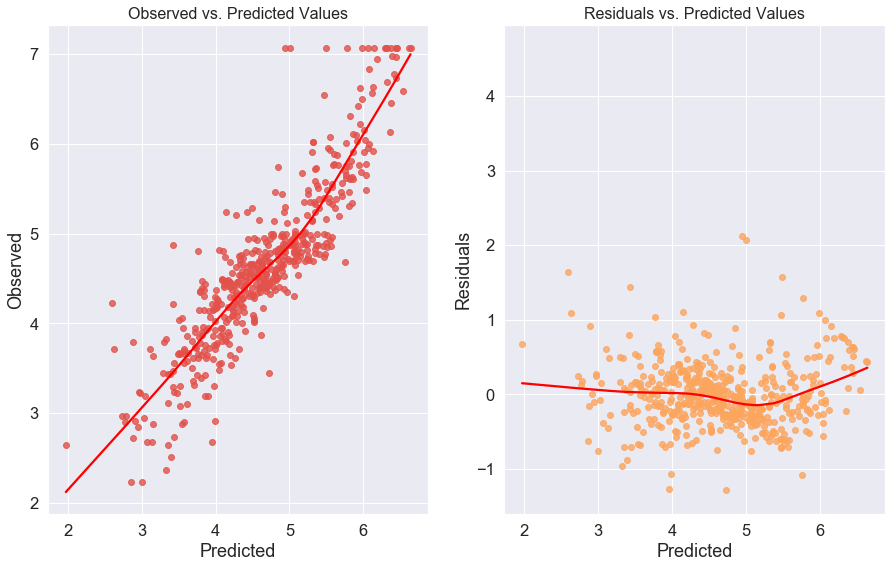

In [43]:
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, ylog)    

In [ ]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)